#Fourieroptik
#Berechnung des Spaltbildes nach Beschneidung des Beugungsbildes
#### Jens Wagner 06/2015
<a  href="http://www.physi.uni-heidelberg.de/Einrichtungen/AP/python/Fourieroptik1.ipynb"<font> Download this notebook</font></a>

Bei der Auswertung des Versuchs Fourieroptik soll untersucht werden, welche Auswirkungen die 
Manipulation des Beugungsbildes in der Fourierebene auf die Struktur des 
Bildes hat. Mit Hilfe eines Analysierspaltes werden Bereiche des 
Beugungsbildes gezielt ausgeblendet, so dass nicht alle Beugungsordnungen 
zur optischen Abbildung beitragen.
<img border="0" src="http://www.physi.uni-heidelberg.de/Einrichtungen/AP/python/data/233aufbau.png" width="316" height="222">

Um das resultierende Bild des Spaltes zu erhalten muss folgendes Integral berechnet werden:
<img border="0" src="http://www.physi.uni-heidelberg.de/Einrichtungen/AP/python/data/integral1.png" width="402" height="66">
mit
<img border="0" src="http://www.physi.uni-heidelberg.de/Einrichtungen/AP/python/data/grenze1.png" width="254" height="29">
wobei d die Spaltbreite und n den Integrationsbereich bez&uuml;glich der Nullstellen angibt. W&auml;hlen Sie z.B. n=1, so erfolgt die Integration nur bis zu den ersten Nullstellen, d.h. nur &uuml;ber das Hauptmaximum. Bei n=2 erfolgt die Integration &uuml;ber das Hauptmaximum und &uuml;ber die ersten Nebenmaxima. 

In [1]:
import numpy as np
from scipy.integrate import quad
from matplotlib import pyplot as plt
%matplotlib inline 

In [2]:
#Integrand
def funktion(k):
    return d/np.pi*np.sin(k*d/2)/(k*d/2)*np.cos(y*k)

In [3]:
d=1  #Spaltbreite auf 1 setzen

In [4]:
n=5  #Integrationsbereich Bsp.: n=5-> Integration bis zur 5. Nullstelle

In [5]:
Y=np.arange(-100,101)/100*d  #y-Werte

In [6]:
#Berechnung des resultierenden Objektbilds

f_modifiziert=[]
for i in range(len(Y)):
    y=Y[i]
    result, error = quad(funktion, 0, 2*np.pi*n/d)  #quad() berechnet die numerische Integration
    f_modifiziert.append(result**2)
    
f_modifiziert=f_modifiziert/np.max(f_modifiziert)  #Kurve auf 1 normieren (Kosmetik)

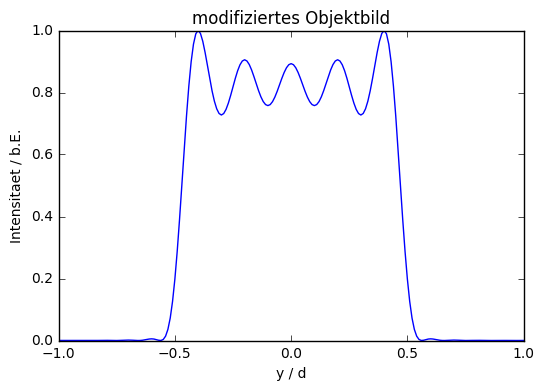

In [7]:
plt.plot(Y,f_modifiziert)
plt.xlabel('y / d')
plt.ylabel('Intensitaet / b.E.')
plt.title('modifiziertes Objektbild')
plt.show()